In [2]:
# imports here
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**DATA PREPROCESSING**

In [20]:
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [23]:
# drop duplicates and update the dataframe
df.drop_duplicates(inplace=True)


In [24]:
df.duplicated().any()

False

In [25]:
df.Cabin.value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [26]:
#Filling missing values in Cabin column with 'B57 B59 B63 B66'
df.Cabin = df.Cabin.fillna('B57 B59 B63 B66')

In [27]:
df.Age.value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [28]:
df.Age = df.Age.fillna('21')

In [29]:
#creating  object of labelEncoder
Age = LabelEncoder()
Ticket = LabelEncoder()
Fare = LabelEncoder()

In [30]:
#converting data types of age,ticket
df['Age'] = Age.fit_transform(df['Age'].astype(str))
df['Ticket'] = Ticket.fit_transform(df['Ticket'])
df['Fare'] = Fare.fit_transform(df['Fare'])



In [31]:
df.Age.astype(int)

0      40
1      56
2      72
3      29
4      22
       ..
413    20
414    47
415    46
416    20
417    20
Name: Age, Length: 418, dtype: int64

In [32]:
df.Fare.value_counts()

19     21
93     19
31     17
50     17
42     11
       ..
35      1
23      1
33      1
146     1
84      1
Name: Fare, Length: 170, dtype: int64

In [33]:
df.Fare = df.Fare.fillna('7')

In [34]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Pclass       418 non-null    int64 
 3   Name         418 non-null    object
 4   Sex          418 non-null    object
 5   Age          418 non-null    int64 
 6   SibSp        418 non-null    int64 
 7   Parch        418 non-null    int64 
 8   Ticket       418 non-null    int64 
 9   Fare         418 non-null    int64 
 10  Cabin        418 non-null    object
 11  Embarked     418 non-null    object
dtypes: int64(8), object(4)
memory usage: 42.5+ KB


In [36]:
#Drop the 'Name','Sex','Cabin','Embarked' Column
to_drop = ['Name', 'Sex','Cabin','Embarked']

df = df.drop(to_drop, axis=1)

In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,32.311005,0.447368,0.392344,180.944976,70.373206
std,120.810458,0.481622,0.841838,17.414372,0.896760,0.981429,107.533763,48.971283
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,20.000000,0.000000,0.000000,85.250000,29.000000
50%,1100.500000,0.000000,3.000000,26.000000,0.000000,0.000000,181.000000,59.000000
75%,1204.750000,1.000000,3.000000,42.750000,1.000000,0.000000,279.750000,106.000000
max,1309.000000,1.000000,3.000000,79.000000,8.000000,9.000000,362.000000,169.000000


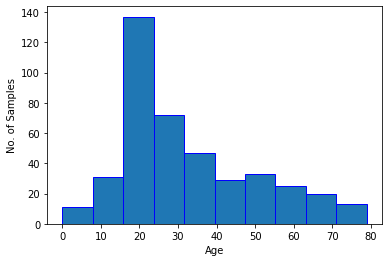

In [38]:
plt.hist(df['Age'],edgecolor='blue', linewidth=1.0)
plt.xlabel('Age')
plt.ylabel('No. of Samples')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
 2   Pclass       418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Ticket       418 non-null    int64
 7   Fare         418 non-null    int64
dtypes: int64(8)
memory usage: 29.4 KB


**SPLIT DATASET**

In [39]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X = X.astype('float')


In [40]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.30 , random_state = 0)

## Decision Tree with criterion GINI index ##

In [41]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

#Check accuracy score with criterion gini index

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.1429


In [42]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.3014


[Text(0.5267857142857143, 0.9, 'X[2] <= 2.5\ngini = 0.982\nsamples = 292\nvalue = [2, 2, 1, 1, 1, 1, 7, 7, 4, 2, 1, 2, 1, 2\n13, 10, 1, 4, 1, 1, 4, 5, 1, 6, 4, 14, 1, 5\n1, 1, 1, 1, 2, 1, 8, 1, 2, 2, 1, 13, 1, 3\n3, 1, 1, 1, 1, 2, 4, 1, 1, 1, 4, 2, 1, 1\n1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 1\n2, 1, 1, 1, 17, 5, 3, 1, 2, 1, 1, 2, 3, 1\n2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2\n1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1\n2, 1, 1, 1, 2, 1, 1]'),
 Text(0.2857142857142857, 0.7, 'X[2] <= 1.5\ngini = 0.962\nsamples = 136\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 1, 8, 1, 2, 2, 1, 13, 0, 3\n0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0\n1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0\n0, 0, 1, 1, 17, 5, 3, 1, 2, 1, 1, 0, 3, 1\n2, 0, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1\n1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2\n1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1\n2, 1, 1, 1, 2, 1, 0]'),
 Text(0.142857142857142

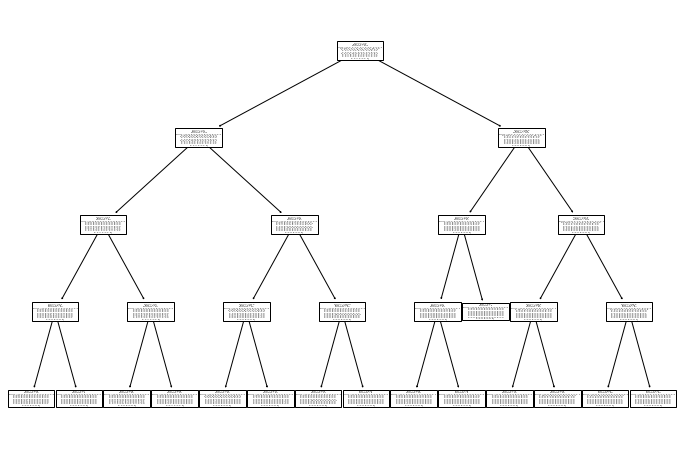

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(clf_gini.fit(X_train, y_train)) 

## Decision Tree with criterion ENTROPY ##

In [43]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [44]:
y_pred_en=clf_en.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.2143


In [45]:
y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.2842


In [76]:
def multiple_trees(X_train, X_test , y_train , y_test , criterion_list , max_depth_list , min_sample_split_list):
  model_result_list = []
  for criterias in criterion_list:
    for depth in max_depth_list:
      for split in min_sample_split_list:
                model = DecisionTreeClassifier(criterion = criterias , max_depth = depth , min_samples_split= split)
                model.fit(X_train , y_train)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test,y_pred)
                # print('accuracy',accuracy)

                result = {'criterion': criterias , 'max_depth':depth , 'min_samples_split':split , 'accuracy':accuracy}
                model_result_list.append(result)
  return model_result_list 




In [77]:
results = multiple_trees(X_train, X_test , y_train , y_test , ['gini' , 'entropy'],[1,2,3,4,5,6,7],[50,100,200])
max_output = []
max_accuracy = 0
for result in results:
  print(result)

  if result['accuracy'] > max_accuracy:
    max_accuracy = result['accuracy']
    max_output = result

print(f"The model with best accuracy is {max_output}")

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50, 'accuracy': 0.03968253968253968}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 100, 'accuracy': 0.03968253968253968}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 200, 'accuracy': 0.03968253968253968}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 50, 'accuracy': 0.07142857142857142}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 100, 'accuracy': 0.07142857142857142}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 200, 'accuracy': 0.03968253968253968}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 50, 'accuracy': 0.1349206349206349}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 100, 'accuracy': 0.1111111111111111}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 200, 'accuracy': 0.03968253968253968}
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 50, 'accuracy': 0.1349206349206349}
{'criterion': 'gini', 'max_depth': 4,